In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.datasets import load_boston

In [2]:
X, y = load_boston(return_X_y=True)
boston_data = load_boston()
features = boston_data['feature_names']

In [3]:
with open('synthetic_data.pkl', 'rb') as file:
    synthetic_data = pickle.load(file)
    
with open('boston_data.pkl', 'rb') as file:
    boston_data = pickle.load(file)

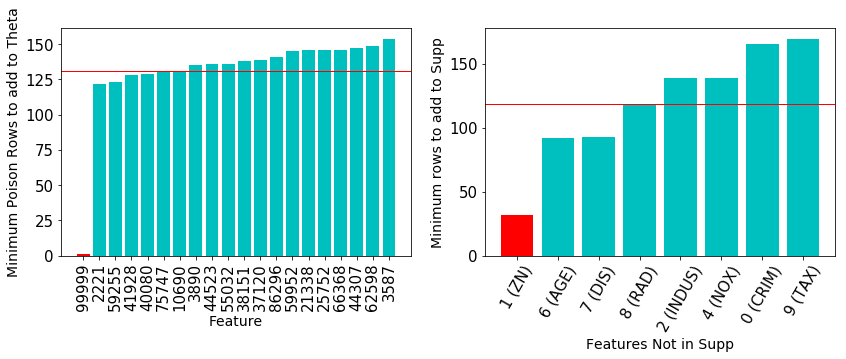

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
plt.rc('font', size=15) 

## Synthetic ##
mean_k = np.asarray(list(synthetic_data.values())).mean()

# Set color of feature 99,999
colors = []
for feature in synthetic_data.keys():
    if(feature == 99999):
        colors.append("r")
    else:
        colors.append("c")

ax1.bar(range(len(synthetic_data)), list(synthetic_data.values()), align='center', color=colors)
x_ticks = []
for key in list(synthetic_data.keys()):
    x_ticks.append(str(key))
ax1.set_xticks(range(len(synthetic_data)))
ax1.set_xticklabels(x_ticks, rotation=90)
ax1.axhline(y=mean_k,linewidth=1, color='r')
ax1.set_xlabel("Feature", fontsize=14)
ax1.set_ylabel("Minimum Poison Rows to add to Theta", fontsize=14)

## Boston ##
mean_k = np.asarray(list(boston_data.values())).mean()
sorted_target_k_dict = {k: v for k, v in sorted(boston_data.items(), key=lambda item: item[1])}

# Set color of minimum feature
colors = ['c']*len(list(boston_data.values()))
colors[0] = 'r'
ax2.bar(range(len(boston_data)), list(boston_data.values()), align='center', color=colors)
x_ticks = []
for key in list(boston_data.keys()):
    x_ticks.append(str(key) + ' (' + str(features[key]) + ')')
ax2.set_xticks(range(len(boston_data)))
ax2.set_xticklabels(x_ticks, rotation=60)
ax2.axhline(y=mean_k,linewidth=1, color='r')
ax2.set_xlabel("Features Not in Supp", fontsize=14)
ax2.set_ylabel("Minimum rows to add to Supp", fontsize=14)
plt.tight_layout()

In [22]:
fig.savefig('main_body_plot.png', format='png', dpi=600, bbox_inches = "tight")